<a href="https://colab.research.google.com/github/dmkarthiksrini/Dissertation/blob/main/Medical_Transcription_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Transcription Analysis using NLP**

-----------------





## **Import Libraries**

In [1]:
!pip install simpletransformers
!pip install transformers
!pip install lime
!pip install wget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 8.9 MB/s eta 0:00:00


In [2]:
# Basic libraries

import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import keras
import string
import random
import itertools
import seaborn as sns

from collections import defaultdict




# Preprocessing

from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from itertools import combinations
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim
from gensim.models import KeyedVectors
import spacy
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from imblearn.under_sampling import NearMiss, RandomUnderSampler
import torch
from imblearn.over_sampling import SMOTE

# Models

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV
from transformers import AutoModel, AutoTokenizer, BertTokenizerFast
from simpletransformers.classification import ClassificationModel, ClassificationArgs



# Evaluation

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, roc_auc_score
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer


import warnings
warnings.filterwarnings("ignore")

import random
RAND = 115

%matplotlib inline



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Load Dataset**

In [3]:
#Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the initial dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Thesis/mtsamples.csv',low_memory=False)

## **Data Review**

In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df

In [7]:
df.describe()

,description,medical_specialty,sample_name,transcription,keywords
count,4999,4999,4999,4966,3931
unique,2348,40,2377,2357,3849
top,An example/template for a routine normal male physical exam.,Surgery,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTOPERATIVE DIAGNOSIS: , Low back pain.,PROCEDURE PERFORMED:,1. Lumbar discogram L2-3.,2. Lumbar discogram L3-4.,3. Lumbar discogram L4-5.,4. Lumbar discogram L5-S1.,ANESTHESIA: ,IV sedation.,PROCEDURE IN DETAIL: ,The patient was brought to the Radiology Suite and placed prone onto a radiolucent table. The C-arm was brought into the operative field and AP, left right oblique and lateral fluoroscopic images of the L1-2 through L5-S1 levels were obtained. We then proceeded to prepare the low back with a Betadine solution and draped sterile. Using an oblique approach to the spine, the L5-S1 level was addressed using an oblique projection angled C-arm in order to allow for perpendicular penetration of the disc space. A metallic marker was then placed laterally and a needle entrance point was determined. A skin wheal was raised with 1% Xylocaine and an #18-gauge needle was advanced up to the level of the disc space using AP, oblique and lateral fluoroscopic projections. A second needle, #22-gauge 6-inch needle was then introduced into the disc space and with AP and lateral fluoroscopic projections, was placed into the center of the nucleus. We then proceeded to perform a similar placement of needles at the L4-5, L3-4 and L2-3 levels.,A solution of Isovue 300 with 1 gm of Ancef was then drawn into a 10 cc syringe and without informing the patient of our injecting, we then proceeded to inject the disc spaces sequentially.",
freq,12,1103,5,5,81


In [8]:
df.columns

Index(['description', 'medical_specialty', 'sample_name', 'transcription',
       'keywords'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [10]:
df.isna().sum()

description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [11]:
df.medical_specialty.unique().shape

(40,)

* Identified 33 entries without any values in the transcription, drooping the same

In [12]:
df = df.dropna(subset=['description', 'transcription', 'medical_specialty']).reset_index(drop=True)
df['description'] = df['description'].str.lower()
df['transcription'] = df['transcription'].str.lower()
df["medical_specialty"] = df["medical_specialty"].str.strip()


In [13]:
df.isna().sum()

description             0
medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64

In [14]:
ms_dist = df['medical_specialty'].value_counts()[0:20]
print(ms_dist)


Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Name: medical_specialty, dtype: int64


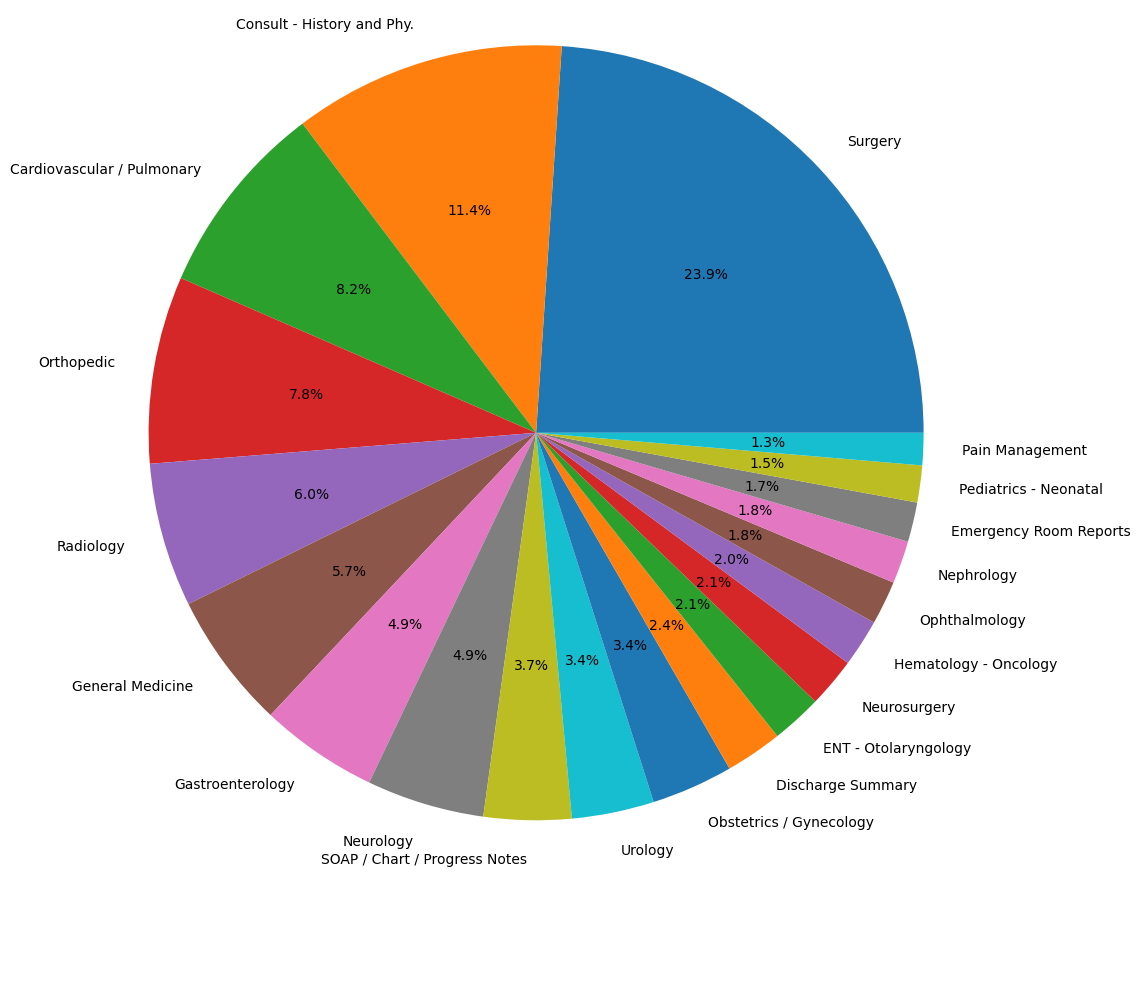

In [15]:
plt.figure(figsize=(11,11))
plt.title(' ', y=-0.15)
plt.pie(ms_dist, labels=list(ms_dist.index), autopct="%.1f%%")
plt.axis('equal');


In [16]:
medical_specialty_list = [] ; word_count_list =[]
for medical_specialty in df['medical_specialty'].unique():
    df_filter = df.loc[(df['medical_specialty'] == medical_specialty)]
    word_count_temp = df_filter['transcription'].str.split().str.len().sum()
    medical_specialty_list.append(medical_specialty)
    word_count_list.append(word_count_temp)
word_count_df = pd.DataFrame({'Medical Specialty':medical_specialty_list, 'Word Count':word_count_list})
word_count_df['Word Count'] = word_count_df['Word Count'].astype('int')
word_count_df = word_count_df.sort_values('Word Count', ascending=False)
word_count_df.reset_index(drop=True)

,Medical Specialty,Word Count
0,Surgery,526754
1,Consult - History and Phy.,287961
2,Orthopedic,198489
3,Cardiovascular / Pulmonary,160867
4,General Medicine,120978
5,Neurology,110677
6,Gastroenterology,80347
7,Radiology,74969
8,Obstetrics / Gynecology,72589
9,Urology,63419


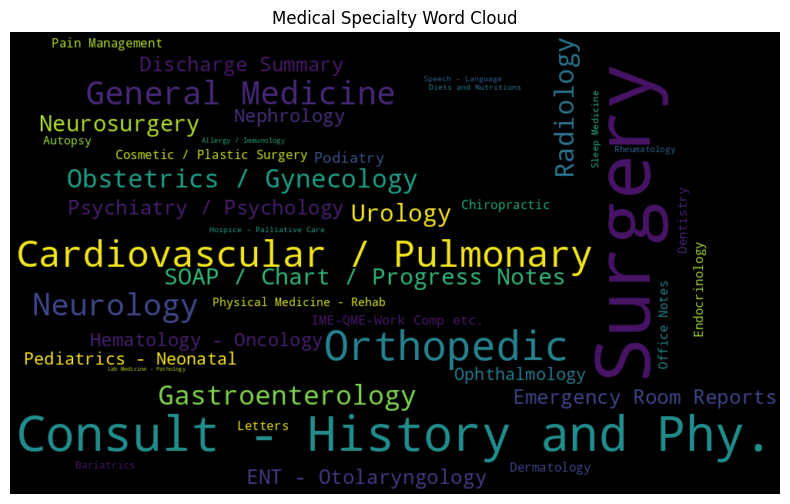

In [17]:
# Generate word cloud
wordcloud_data = dict(zip(word_count_df['Medical Specialty'], word_count_df['Word Count']))
wordcloud = WordCloud(width=1000, height=600, background_color='black').generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Medical Specialty Word Cloud')
plt.show()

### Observations
* Based on the above chart most of the transcription is for the genera, surgery and consultation
* Potential medical speciality is less than those.

In [18]:
df.iloc[4]['transcription']

'1.  the left ventricular cavity size and wall thickness appear normal.  the wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%.  there is near-cavity obliteration seen.  there also appears to be increased left ventricular outflow tract gradient at the mid cavity level consistent with hyperdynamic left ventricular systolic function.  there is abnormal left ventricular relaxation pattern seen as well as elevated left atrial pressures seen by doppler examination.,2.  the left atrium appears mildly dilated.,3.  the right atrium and right ventricle appear normal.,4.  the aortic root appears normal.,5.  the aortic valve appears calcified with mild aortic valve stenosis, calculated aortic valve area is 1.3 cm square with a maximum instantaneous gradient of 34 and a mean gradient of 19 mm.,6.  there is mitral annular calcification extending to leaflets and supportive structures with thickening of mitral valve leaflets with mi

### **Observation**

* For 5000 Objects we couls see that the classes are deeply imbalanaced

### **Sentence Structure Evaluation**

In [19]:
# Create a list of tokens for each sentence
tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df["transcription"].apply(tokenizer.tokenize)

all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

2420937 words total, with a vocabulary size of 22498
Max sentence length is 3114


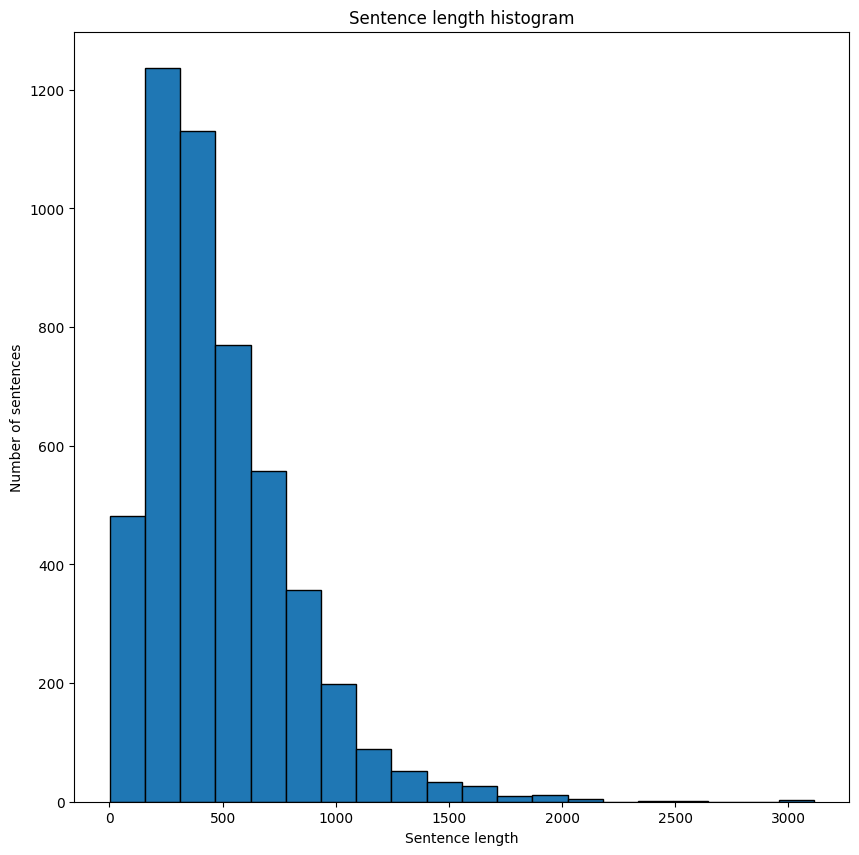

In [21]:
fig = plt.figure(figsize=(10, 10))
plt.title('Sentence length histogram')
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths, edgecolor = 'black', bins = 20)
plt.show()

In [22]:
print(f"Median sentence length {np.median(sentence_lengths)}")
print(f"Mean sentence length {round(np.mean(sentence_lengths), 2)}")

Median sentence length 421.5
Mean sentence length 487.5


### **Observation**

* Average length of the Sentence is too high.
* Based on the Above results the mean and median values are over 400 words

## **Data Transformation**

In [23]:
# Text preparation

def basic_preprocessing(df):

    df_temp = df.copy(deep = True)

    df_temp = df_temp.rename(index = str, columns = {'transcription': 'text'})

    df_temp.loc[:, 'text'] = [text_prepare(x) for x in df_temp['text'].values]

    le = LabelEncoder()
    le.fit(df_temp['medical_specialty'])
    df_temp.loc[:, 'class_label'] = le.transform(df_temp['medical_specialty'])

    tokenizer = RegexpTokenizer(r'\w+')

    df_temp["tokens"] = df_temp["text"].apply(tokenizer.tokenize)

    return df_temp

def text_prepare(text):

    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))

    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub('', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    words = text.split()
    i = 0
    while i < len(words):
        if words[i] in STOPWORDS:
            words.pop(i)
        else:
            i += 1
    text = ' '.join(map(str, words))# delete stopwords from text

    return text

# Introduce evaluation metrics

def get_metrics(y_test, y_predicted):

    precision = precision_score(y_test, y_predicted, average='weighted')

    recall = recall_score(y_test, y_predicted, average='weighted')

    f1 = f1_score(y_test, y_predicted, average='weighted')

    accuracy = accuracy_score(y_test, y_predicted)

    # new metrics
    #conf_matrix = confusion_matrix(y_test, y_predicted)

    #roc_auc = roc_auc_score(y_test, y_predicted)

    return accuracy, precision, recall, f1

As part of Data Transformation we have performed the following;
* Tokenization
* Replacing the Punctuation marks
* Deleting Stopwords
* Replacing Space

## **Bag Of Words**

In [24]:
def BOW(data):

    df_temp = data.copy(deep = True)
    df_temp = basic_preprocessing(df_temp)

    count_vectorizer = CountVectorizer()
    count_vectorizer.fit(df_temp['text'])

    list_corpus = df_temp["text"].tolist()
    list_labels = df_temp["class_label"].tolist()

    X = count_vectorizer.transform(list_corpus)

    return X, list_labels

## **TF-IDF**

In [25]:
def tfidf(data, ngrams = 1):

    df_temp = data.copy(deep = True)
    df_temp = basic_preprocessing(df_temp)

    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, ngrams))
    tfidf_vectorizer.fit(df_temp['text'])

    list_corpus = df_temp["text"].tolist()
    list_labels = df_temp["class_label"].tolist()

    X = tfidf_vectorizer.transform(list_corpus)

    return X, list_labels

## **Word2Vec**

In [26]:
# Define the path to your Word2Vec model
model_path = '/content/drive/MyDrive/Thesis/GoogleNews-vectors-negative300-001.bin'

# Load the Word2Vec model
word2vec = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [27]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors,
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [28]:
def w2v(data):

    df_temp = data.copy(deep = True)
    df_temp = basic_preprocessing(df_temp)

    embeddings = get_word2vec_embeddings(word2vec, df_temp)
    list_labels = df_temp["class_label"].tolist()

    return embeddings, list_labels

## **GloVe**

In [29]:
# Define the path to your GloVe model file
glove_file_path = '/content/drive/MyDrive/Thesis/glove.6B.300d.txt'

# Load the GloVe model into a dictionary
glove_model = {}
with open(glove_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=np.float32)
        glove_model[word] = vector

def glove_embeddings(data):

    df_temp = data.copy(deep=True)
    df_temp = basic_preprocessing(df_temp)

    # List of texts and labels
    list_corpus = df_temp["text"].tolist()
    list_labels = df_temp["class_label"].tolist()

    # Calculate average GloVe embedding for each text
    list_embeddings = []
    for text in list_corpus:
        tokens = text.split()
        word_vectors = []
        for token in tokens:
            if token in glove_model:
                word_vectors.append(glove_model[token])

        if len(word_vectors) > 0:
            doc_vector = np.mean(word_vectors, axis=0)
        else:
            doc_vector = np.zeros(300)

        list_embeddings.append(doc_vector)

    X = np.array(list_embeddings)

    return X, list_labels


## Data Adjustment

In [31]:
# Dropping entries with counts less than 100
counts = df['medical_specialty'].value_counts()
counts

Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surgery         27
Dentistry                          27
Letters     

In [32]:
df_100 = df[df['medical_specialty'].isin(counts[counts > 100].index)]

In [33]:
df_100['labels'] = LabelEncoder().fit_transform(df_100['medical_specialty'])

In [34]:
df_100['medical_specialty'].value_counts()

Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
Name: medical_specialty, dtype: int64

#### Observation
* From the results imbalancing is still high but the measure might help us get better results

#### Thoughts and next steps

With the full-dataset baseline model in hand, we'll use two algorithms—Naive Bayes, and Logistic Regression to see if we can improve it.

## Naive Bayes

In [35]:
def training_naive(X_train_naive, X_test_naive, y_train_naive, y_test_naive, preproc):

    clf = MultinomialNB()
    clf.fit(X_train_naive, y_train_naive)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

    y_pred = clf.predict(X_test_naive)

    f1 = f1_score(y_pred, y_test_naive, average = 'weighted')
    pres = precision_score(y_pred, y_test_naive, average = 'weighted')
    rec = recall_score(y_pred, y_test_naive, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_naive)

    res = res.append({'Preprocessing': preproc, 'Model': 'Naive Bayes', 'Precision': pres,
                     'Recall': rec, 'F1-score': f1, 'Accuracy': acc}, ignore_index = True)


    return res

## Logistic Regression

In [36]:
def training_logreg(X_train_log, X_test_log, y_train_log, y_test_log, preproc):

    folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 40)

    clf = LogisticRegressionCV(cv = folds, solver = 'saga', multi_class = 'multinomial', n_jobs = -1)

    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

    y_pred = clf.predict(X_test_log)

    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)

    res = res.append({'Preprocessing': preproc, 'Model': f'Logistic Regression', 'Precision': pres,
                     'Recall': rec, 'F1-score': f1, 'Accuracy': acc}, ignore_index = True)

    return res

## **Handling Imbalance Problem using sampling**

It's clear that the disparity between class sizes is still holding us back.

Several strategies exist to address inequality:

* Undersampling
* Oversampling
* Make use of class-weighted classifiers

The prior one was solved using logistic regression.

In undersampling, the number of observations from the major classes is reduced so that they have a greater number of observations in common with the minor classes. We have a lot of data, so this strategy may not pay off if we reduce the amount of data even further and the quality of the model suffers as a result. However, there is still hope. Dropping some samples at random doesn't change the distribution, so we can drop some observations. It is not guaranteed by a lack of data or a random selection of samples. Therefore, sophisticated approaches are required.

The opposite of undersampling, oversampling involves including more instances of observations from underrepresented classes in the sample. Overfitting is likely to occur if we double some samples because we are working with text data. Therefore, a more complex approach is required, as was the case with undersampling.


### Undersampling Near Miss

In [37]:
near_under_sample = NearMiss(sampling_strategy='majority')
X, y = BOW(df_100)
print(f"Initial set observations {X.shape[0]}")
print(f"Initial set target classes {len(set(y))}")
X, y = near_under_sample.fit_resample(X, y)
print(f"Modified set observations {X.shape[0]}")
print(f"Modified set target classes {len(set(y))}")

Initial set observations 3894
Initial set target classes 12
Modified set observations 2914
Modified set target classes 12


In [38]:
# DataFrame for result evaluation

near_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

near_under_sample = NearMiss(sampling_strategy='majority')

# Testing Count Vectorizer

X, y = BOW(df_100)
X, y = near_under_sample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
near_result = near_result.append(training_naive(X_train, X_test, y_train, y_test, 'Count Vectorize'), ignore_index = True)
near_result = near_result.append(training_logreg(X_train, X_test, y_train, y_test, 'Count Vectorize'), ignore_index = True)

# Testing TF-IDF with 1-gram

X, y = tfidf(df_100, ngrams = 1)
X, y = near_under_sample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
near_result = near_result.append(training_naive(X_train, X_test, y_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)
near_result = near_result.append(training_logreg(X_train, X_test, y_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)

# Testing Word2vec

X, y = w2v(df_100)
X, y = near_under_sample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
near_result = near_result.append(training_logreg(X_train, X_test, y_train, y_test, 'Word2vec'), ignore_index = True)


In [39]:
near_result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,Count Vectorize,Naive Bayes,0.536286,0.437393,0.471270,0.437393
1,Count Vectorize,Logistic Regression,0.593574,0.488851,0.521999,0.488851
2,TF-IDF 1-grams,Naive Bayes,0.796013,0.413379,0.499468,0.413379
3,TF-IDF 1-grams,Logistic Regression,0.698165,0.488851,0.551167,0.488851
4,Word2vec,Logistic Regression,0.547928,0.502573,0.516754,0.502573


### **Oversampling SMOTE**

In [42]:
smote_over_sample = SMOTE(sampling_strategy='minority')
X, y = BOW(df_100)
print(f"Initial set observations {X.shape[0]}")
print(f"Initial set target classes {len(set(y))}")
X, y = smote_over_sample.fit_resample(X, y)
print(f"Modified set observations {X.shape[0]}")
print(f"Modified set target classes {len(set(y))}")

Initial set observations 3894
Initial set target classes 12
Modified set observations 4874
Modified set target classes 12


In [43]:
# DataFrame for result evaluation

smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

smote_over_sample = SMOTE(sampling_strategy='minority')

# Testing Count Vectorizer

X, y = BOW(df_100)
X, y = smote_over_sample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
smote_result = smote_result.append(training_naive(X_train, X_test, y_train, y_test, 'Count Vectorize'), ignore_index = True)
smote_result = smote_result.append(training_logreg(X_train, X_test, y_train, y_test, 'Count Vectorize'), ignore_index = True)

# Testing TF-IDF with 1-gram

X, y = tfidf(df_100, ngrams = 1)
X, y = smote_over_sample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
smote_result = smote_result.append(training_naive(X_train, X_test, y_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)
smote_result = smote_result.append(training_logreg(X_train, X_test, y_train, y_test, 'TF-IDF 1-grams'), ignore_index = True)

# Testing Word2vec

X, y = w2v(df_100)
X, y = smote_over_sample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
smote_result = smote_result.append(training_logreg(X_train, X_test, y_train, y_test, 'Word2vec'), ignore_index = True)

In [44]:
smote_result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,Count Vectorize,Naive Bayes,0.592275,0.511795,0.536930,0.511795
1,Count Vectorize,Logistic Regression,0.734150,0.547692,0.614773,0.547692
2,TF-IDF 1-grams,Naive Bayes,0.941077,0.458462,0.604569,0.458462
3,TF-IDF 1-grams,Logistic Regression,0.836479,0.555897,0.652969,0.555897
4,Word2vec,Logistic Regression,0.705311,0.564103,0.615465,0.564103


### Combining the result for comparison

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the two dataframes named 'near_result' & 'smote_result'

# Add a 'Sampling' column to each dataframe to identify the sampling method
near_result['Sampling'] = 'Nearmiss'
smote_result['Sampling'] = 'SMOTE'

# Combine all dataframes into a single dataframe
combined_df = pd.concat([near_result, smote_result], ignore_index=True)

In [47]:
combined_df

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy,Sampling
0,Count Vectorize,Naive Bayes,0.536286,0.437393,0.471270,0.437393,Nearmiss
1,Count Vectorize,Logistic Regression,0.593574,0.488851,0.521999,0.488851,Nearmiss
2,TF-IDF 1-grams,Naive Bayes,0.796013,0.413379,0.499468,0.413379,Nearmiss
3,TF-IDF 1-grams,Logistic Regression,0.698165,0.488851,0.551167,0.488851,Nearmiss
4,Word2vec,Logistic Regression,0.547928,0.502573,0.516754,0.502573,Nearmiss
5,Count Vectorize,Naive Bayes,0.592275,0.511795,0.536930,0.511795,SMOTE
6,Count Vectorize,Logistic Regression,0.734150,0.547692,0.614773,0.547692,SMOTE
7,TF-IDF 1-grams,Naive Bayes,0.941077,0.458462,0.604569,0.458462,SMOTE
8,TF-IDF 1-grams,Logistic Regression,0.836479,0.555897,0.652969,0.555897,SMOTE
9,Word2vec,Logistic Regression,0.705311,0.564103,0.615465,0.564103,SMOTE


In [48]:
# Create a pivot table to aggregate metrics by PreprocessingModel and Sampling
pivot_table = combined_df.pivot_table(
    index=['Preprocessing','Model', 'Sampling'],
    values=['Precision', 'Recall', 'F1-score', 'Accuracy']
)

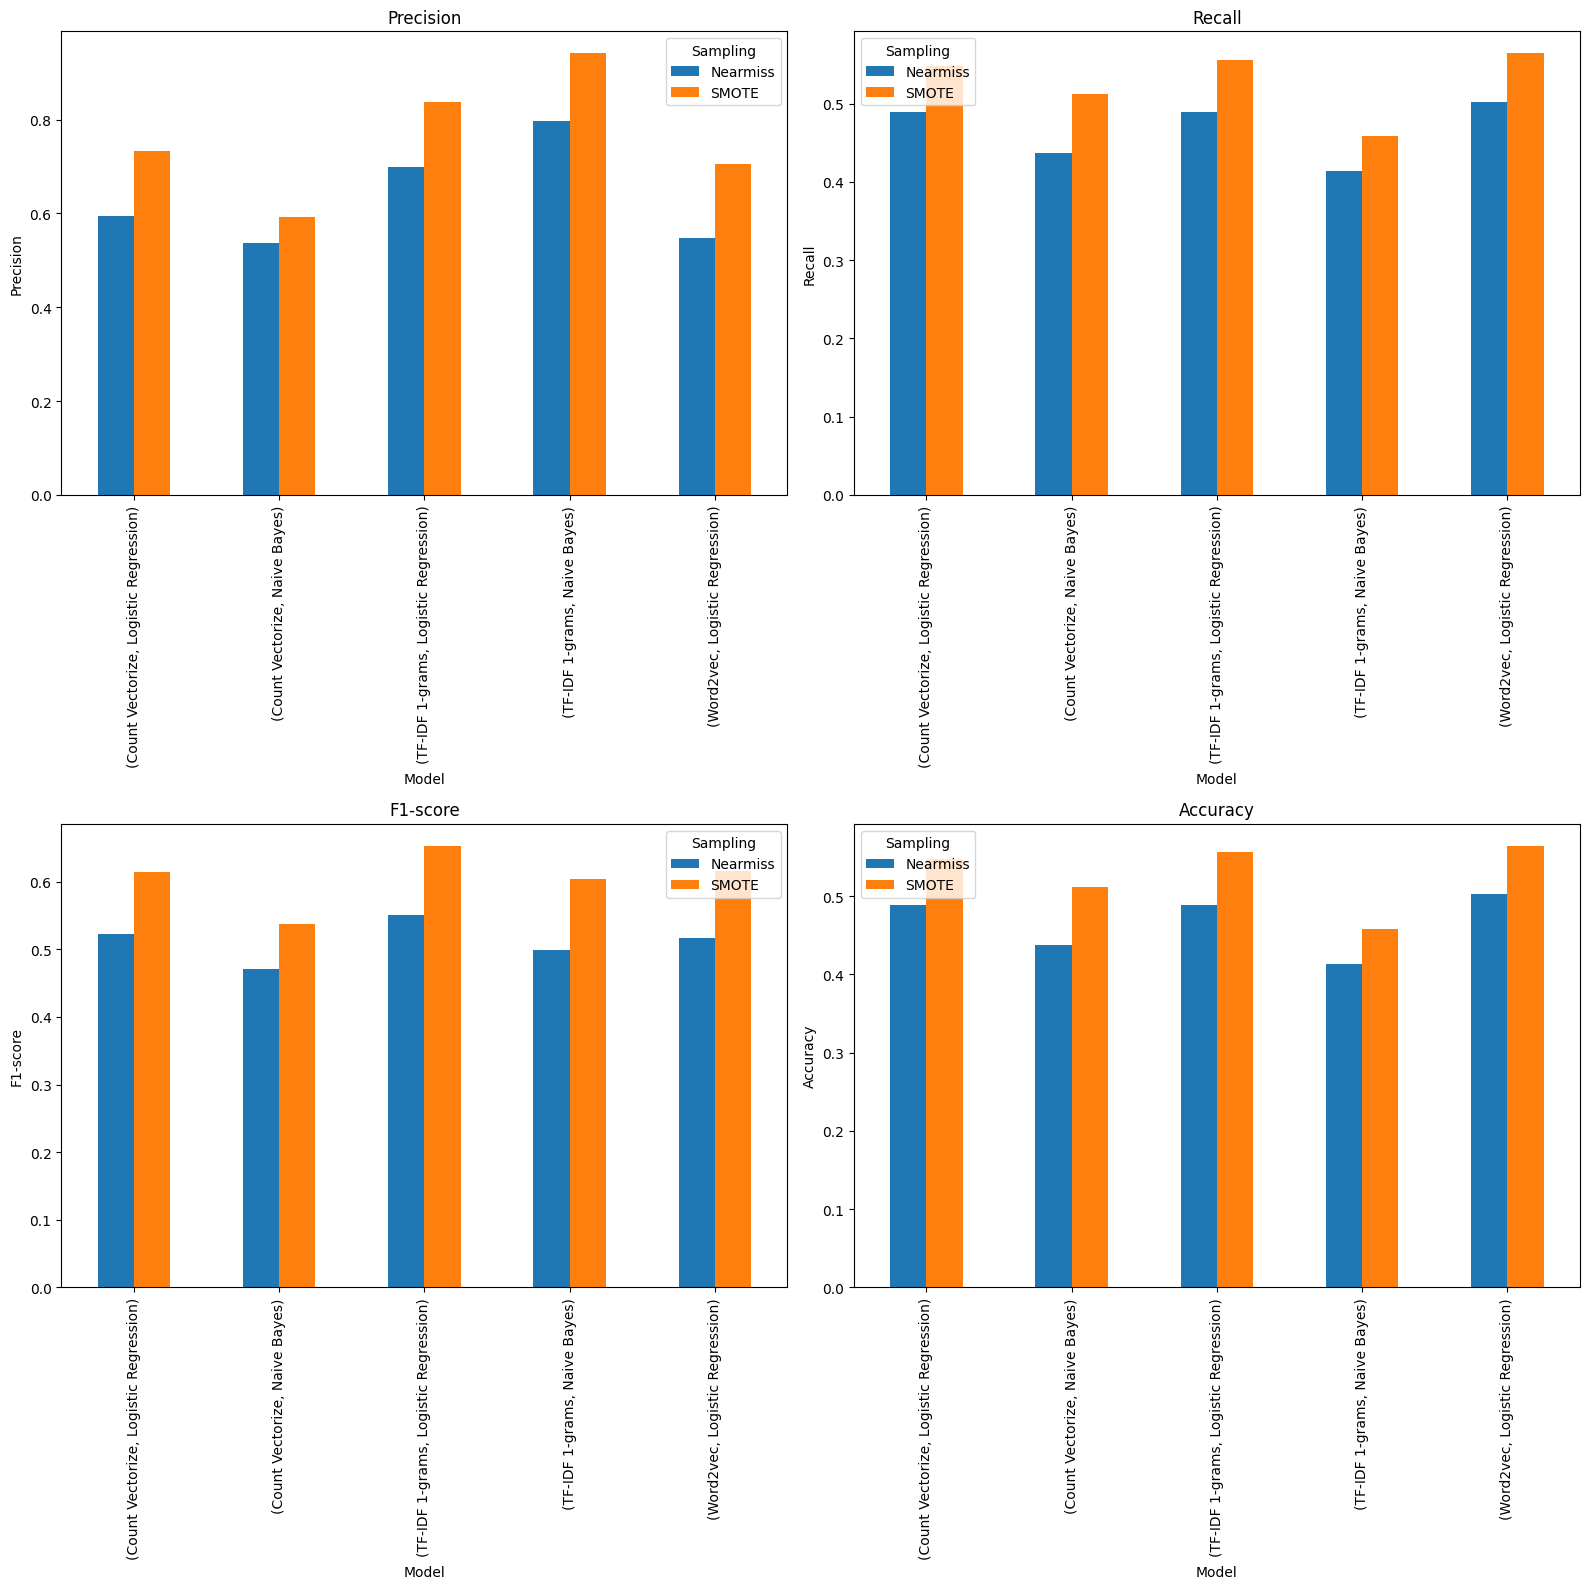

In [49]:

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    pivot_table[metric].unstack().plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Preprocessing')
    ax.set_xlabel('Model')
    ax.legend(title='Sampling')

plt.tight_layout()
plt.show()

### **Best Model Result Analysis**

In [51]:
X, y = w2v(df_100)
X, y = smote_over_sample.fit_resample(X, y)
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 40)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X, y, test_size=0.2, random_state=40)
clf_w2v_smote = LogisticRegressionCV(cv = folds, solver = 'saga', multi_class = 'multinomial', n_jobs = -1)
clf_w2v_smote.fit(X_train_smote, y_train_smote)
y_pred = clf_w2v_smote.predict(X_test_smote)

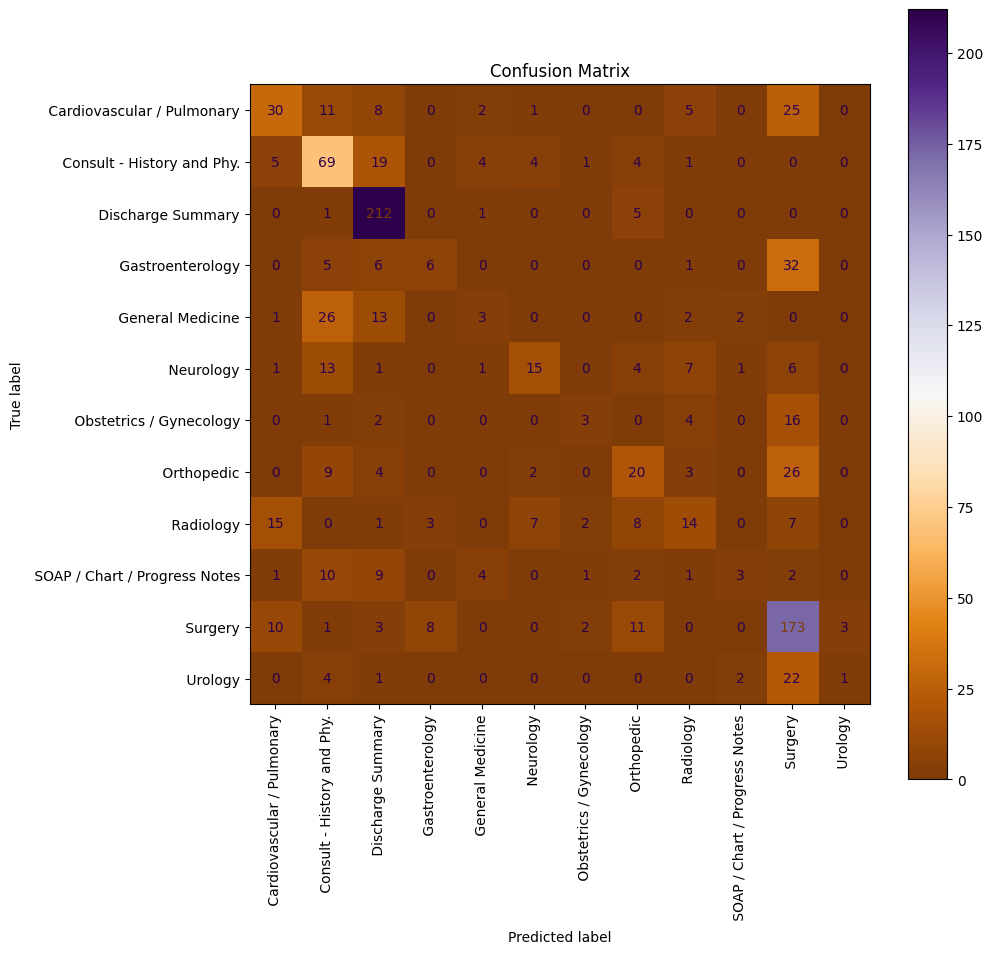

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

classes = [' Cardiovascular / Pulmonary', ' Consult - History and Phy.', ' Discharge Summary',
           ' Gastroenterology', ' General Medicine', ' Neurology', ' Obstetrics / Gynecology',
           ' Orthopedic', ' Radiology', ' SOAP / Chart / Progress Notes', ' Surgery', ' Urology']
cm = confusion_matrix(y_test_smote, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='PuOr', ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

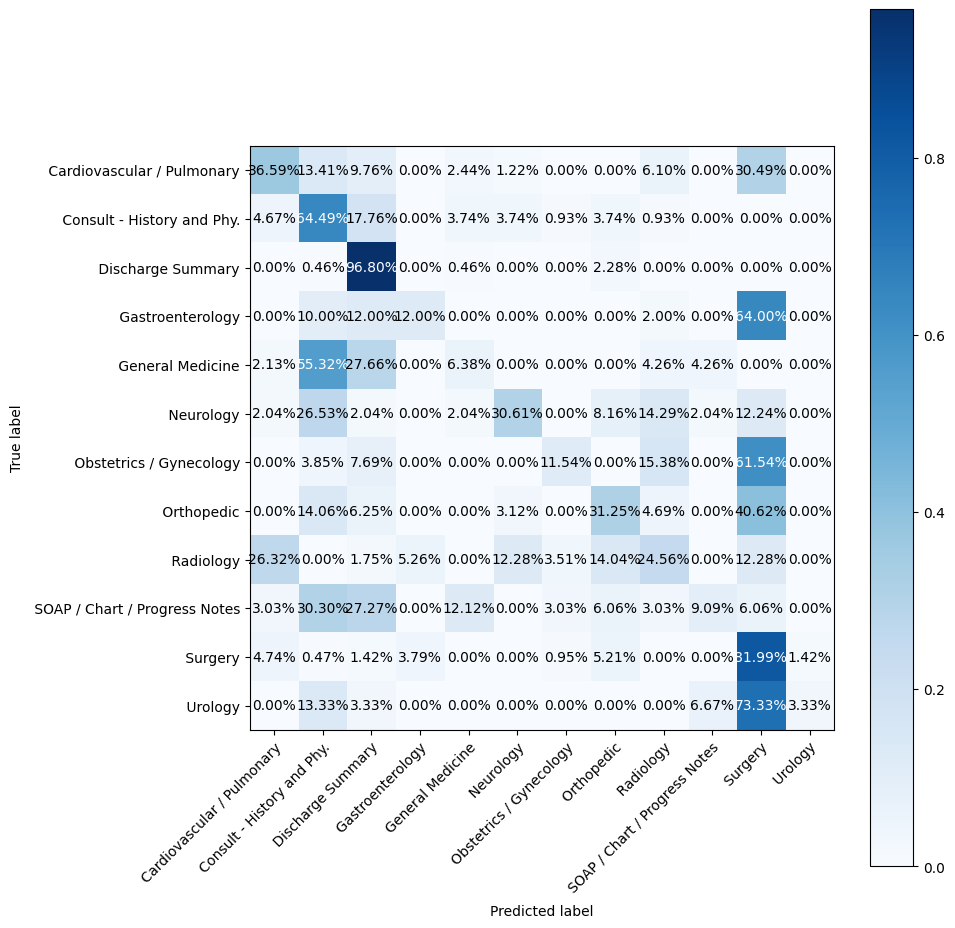

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

classes = [' Cardiovascular / Pulmonary', ' Consult - History and Phy.', ' Discharge Summary',
           ' Gastroenterology', ' General Medicine', ' Neurology', ' Obstetrics / Gynecology',
           ' Orthopedic', ' Radiology', ' SOAP / Chart / Progress Notes', ' Surgery', ' Urology']

cm = confusion_matrix(y_test_smote, y_pred)

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 10))

# Plot confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Show percentages in cells
fmt = '.2%'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Label axes
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       ylabel="True label",
       xlabel="Predicted label")

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

Class | AUC
------|-----
    0 | 0.91
    1 | 0.90
    2 | 0.98
    3 | 0.93
    4 | 0.90
    5 | 0.93
    6 | 0.91
    7 | 0.91
    8 | 0.92
    9 | 0.87
   10 | 0.88
   11 | 0.91


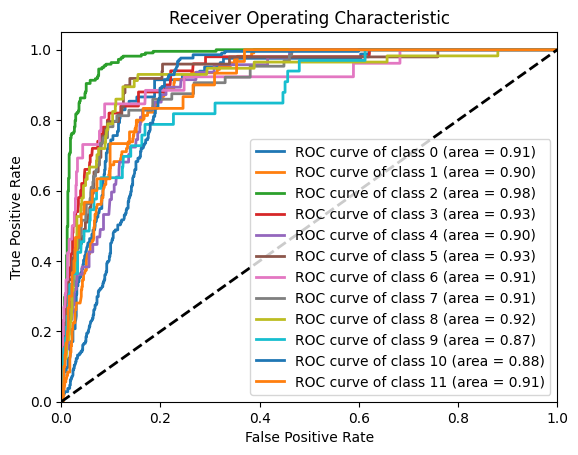

In [93]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test_smote, classes=np.unique(y))
y_score = clf_w2v_smote.decision_function(X_test_smote)  # Get the decision function scores

fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = len(np.unique(y))

# Print header for AUC table
print("Class | AUC")
print("------|-----")

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Print AUC for each class
    print(f"{i:5} | {roc_auc[i]:.2f}")

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2  # Line width

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## **Transformer Model RoBERTa Implementation**

#### **Subsampling to create a new dataframe with less entries to ease the model implementation**

In [56]:
def get_subsample(df_100, n):
    indices = np.random.choice(df_100.index, size=n, replace=False)
    return df_100.loc[indices].copy()

df2 = get_subsample(df_100, 1000)

In [57]:
# Identinfying the number of categories and creating a dictinory
# Dropping NA

num_classes = len(df2['medical_specialty'].unique())
class_dict = dict(zip(df2['medical_specialty'].unique(),list(range(num_classes))))
df2['medical_specialty'] = df2['medical_specialty'].apply(lambda x:class_dict[x])
df2.dropna(inplace=True)

In [58]:
num_classes

12

In [59]:
# Concatenating the Transcription and Keywords to single column and assigning target and reference variables

df2['transcription'] = df2['keywords']+df2['transcription']

X = df2[['transcription']]
y = df2[["medical_specialty"]]

In [60]:
# Splitting to Train and Test dataset with test size of 25% and train Size of 75% of the dataset
# Creating formula for the class weights based on the Num_classes (in here it is 12)

train_x,test_x,train_y,test_y = train_test_split(X,y, stratify=y,test_size=0.25)
class_weights = [1]*num_classes

In [62]:
# Train Dataset

train_df = pd.DataFrame(columns=['text','labels'])
train_df['text'] = train_x['transcription']
train_df['labels'] = train_y['medical_specialty']
print(train_df.head())

In [63]:
# Test Dataset
test_df = pd.DataFrame(columns=['text','labels'])
test_df['text'] = test_x['transcription']
test_df['labels'] = test_y['medical_specialty']

In [64]:
learning_rate = 1e-5
num_of_epochs = 3
cuda_available = torch.cuda.is_available()

In [65]:
model_args = ClassificationArgs(num_train_epochs=num_of_epochs,learning_rate = learning_rate,  reprocess_input_data= True,save_model_every_epoch=False, overwrite_output_dir= True)

In [66]:
model = ClassificationModel(
        "roberta",
        "roberta-base",
        num_labels=num_classes,
        weight=class_weights,
        use_cuda=cuda_available,
        args=model_args
        )

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
model.train_model(train_df)
model.save_model()
result, model_outputs, wrong_predictions = model.eval_model(test_df)

  0%|          | 0/604 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/26 [00:00<?, ?it/s]

In [68]:
result,output = model.predict(test_df['text'].values.tolist())

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

In [69]:
from sklearn.metrics import f1_score, balanced_accuracy_score

def eval_metrics(actual, pred):
    bal_acc = balanced_accuracy_score(actual,pred)
    f1_sc = f1_score(actual,pred,average="micro")
    return bal_acc, f1_sc

acc, f1 = eval_metrics(test_df['labels'],result)

print(acc,f1)

0.3872694911297853 0.6732673267326733


### **With Full Dataset df_100**

In [70]:
# Identinfying the number of categories and creating a dictinory
# Dropping NA

num_classes = len(df_100['medical_specialty'].unique())
class_dict = dict(zip(df_100['medical_specialty'].unique(),list(range(num_classes))))
df_100['medical_specialty'] = df_100['medical_specialty'].apply(lambda x:class_dict[x])
df_100.dropna(inplace=True)

In [71]:
num_classes

12

In [72]:
# Concatenating the Transcription and Keywords to single column and assigning target and reference variables

df_100['transcription'] = df_100['keywords']+df_100['transcription']

X = df_100[['transcription']]
y = df_100[["medical_specialty"]]

In [73]:
# Splitting to Train and Test dataset with test size of 25% and train Size of 75% of the dataset
# Creating formula for the class weights based on the Num_classes (in here it is 12)

train_x,test_x,train_y,test_y = train_test_split(X,y, stratify=y,test_size=0.25)
class_weights = [1]*num_classes

In [ ]:
# Train Dataset

train_df = pd.DataFrame(columns=['text','labels'])
train_df['text'] = train_x['transcription']
train_df['labels'] = train_y['medical_specialty']

In [75]:
# Test Dataset
test_df = pd.DataFrame(columns=['text','labels'])
test_df['text'] = test_x['transcription']
test_df['labels'] = test_y['medical_specialty']

In [76]:
learning_rate = 1e-5
num_of_epochs = 3
cuda_available = torch.cuda.is_available()

In [77]:
model_args = ClassificationArgs(num_train_epochs=num_of_epochs,learning_rate = learning_rate,  reprocess_input_data= True,save_model_every_epoch=False, overwrite_output_dir= True)

In [78]:
model2 = ClassificationModel(
        "roberta",
        "roberta-base",
        num_labels=num_classes,
        weight=class_weights,
        use_cuda=cuda_available,
        args=model_args
        )

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [79]:
model2.train_model(train_df)
model2.save_model()
result, model_outputs, wrong_predictions = model.eval_model(test_df)

  0%|          | 0/2315 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/290 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/290 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/772 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/97 [00:00<?, ?it/s]

In [80]:
result,output = model2.predict(test_df['text'].values.tolist())

  0%|          | 0/772 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

In [81]:
from sklearn.metrics import f1_score, balanced_accuracy_score

def eval_metrics(actual, pred):
    bal_acc = balanced_accuracy_score(actual,pred)
    f1_sc = f1_score(actual,pred,average="micro")
    return bal_acc, f1_sc

acc, f1 = eval_metrics(test_df['labels'],result)

print(acc,f1)

0.9788326065408469 0.9831606217616581


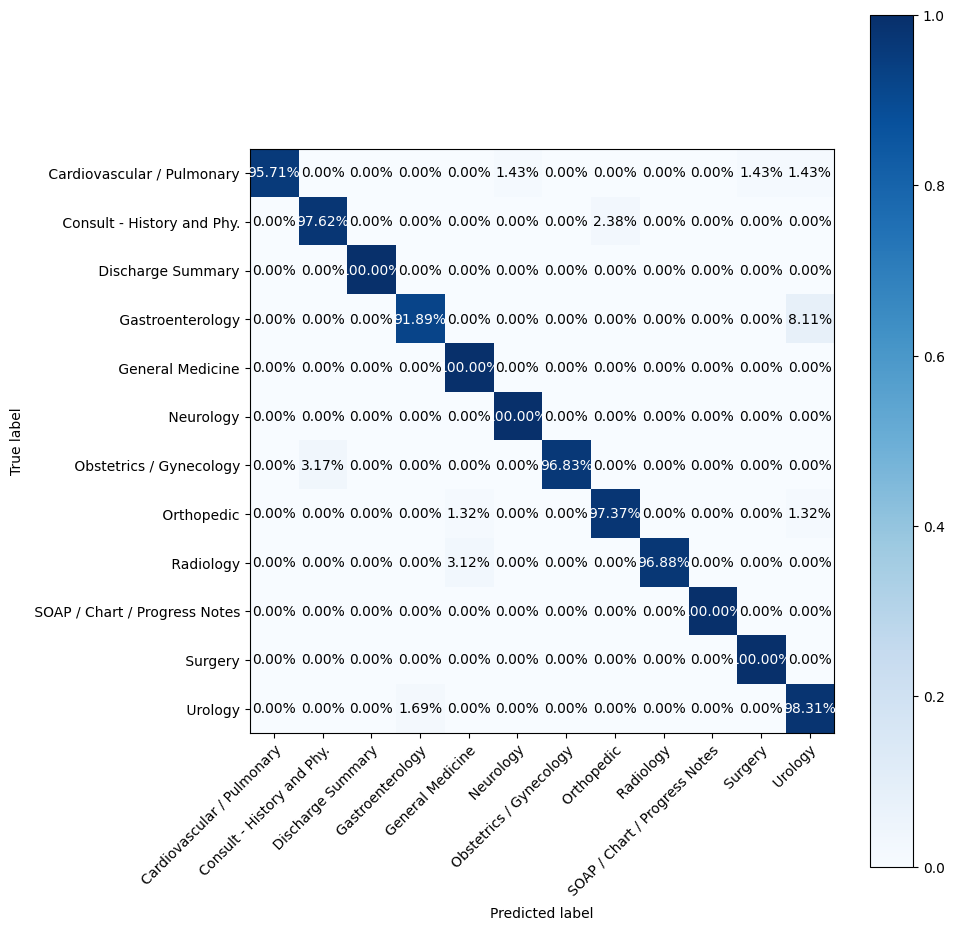

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

classes = [' Cardiovascular / Pulmonary', ' Consult - History and Phy.', ' Discharge Summary',
           ' Gastroenterology', ' General Medicine', ' Neurology', ' Obstetrics / Gynecology',
           ' Orthopedic', ' Radiology', ' SOAP / Chart / Progress Notes', ' Surgery', ' Urology']

#cm = confusion_matrix(y_test_smote, y_pred)
cm = confusion_matrix(test_y, result)

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 10))

# Plot confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Show percentages in cells
fmt = '.2%'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Label axes
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       ylabel="True label",
       xlabel="Predicted label")

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

Class | AUC
------|-----
    0 | 0.70
    1 | 0.18
    2 | 0.60
    3 | 0.55
    4 | 0.00
    5 | 0.92
    6 | 0.63
    7 | 0.94
    8 | 0.37
    9 | 0.80
   10 | 0.71
   11 | 0.18


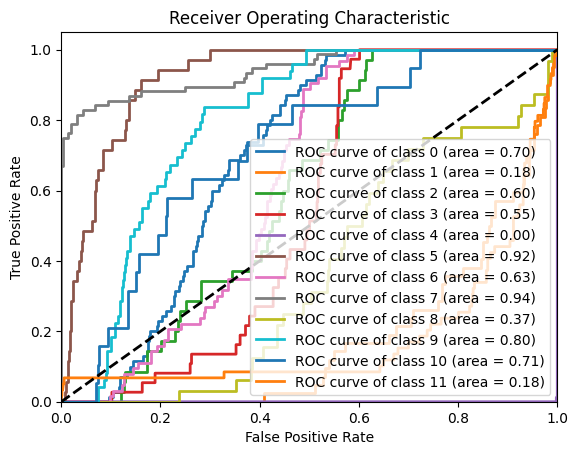

In [92]:
y_test_bin = label_binarize(test_y, classes=list(range(num_classes)))
y_score = model_outputs
fpr = dict()
tpr = dict()
roc_auc = dict()

# To Print header for AUC table
print("Class | AUC")
print("------|-----")

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # To Print AUC for each class
    print(f"{i:5} | {roc_auc[i]:.2f}")

plt.figure()
lw = 2  # Line width

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
